In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


In [2]:
#data_path = '/mnt/labserver/HURTAK_Femke/Experimental_data/Optogenetics/Optobot/G7/GtACR2/231129_red_led/113230_s2a10_p6-0/'
data_path = '/mnt/labserver/HURTAK_Femke/Experimental_data/Optogenetics/Optobot/web/GtACR2/231219_blue_light_and_light_on/154320_s1a8_p6-0'


In [3]:
#centroid_file_name = 'G7_GtACR2_p6-0_80fps_tracked.pkl'
centroid_file_name = [f for f in os.listdir(data_path) if f.endswith('.pkl')][0]
centroid_file_path = os.path.join(data_path, centroid_file_name)
stimulation_file_name = 'experiment_dict.npy'
stimulation_file_path = os.path.join(data_path, stimulation_file_name)


In [4]:
stim_data = np.load(stimulation_file_path, allow_pickle=True).item()
#stim_data['fly0']['on0']

In [5]:
data = pd.read_pickle(centroid_file_path)

In [6]:
# add a column 'stimulation' to the data frame, where the value is 1 if the
# stimulus was on and 0 if the stimulus was off.
dlc_data_path = os.path.join(data_path, 'resultsDLC')
data['stimulation'] = 0


In [7]:
#npy_file = np.load(os.path.join(data_path,'resultsDLC/vid_p6-0_off0_fly0.npy'), allow_pickle=True)
#npy_file # x,y, angle

In [8]:
start_frame = stim_data['fly0'][stim_data['stimulation_paradigm'][0]]['startFrame']
end_frame = stim_data['fly0'][stim_data['stimulation_paradigm'][0]]['stopFrame']
if 'on' in stim_data['stimulation_paradigm'][0]:
    data.loc[start_frame:end_frame, 'stimulation'] = 1
    # add DLC data
# find file starting with 'vid_p6-0_' + stim and ending with '.h5'
dlc_file = [f for f in os.listdir(dlc_data_path) if f.startswith('vid_p6-0_' + stim_data['stimulation_paradigm'][0]) and f.endswith('.h5')]
dlc_data = pd.read_hdf(os.path.join(dlc_data_path, dlc_file[0]))
# remove the first level of columns indexing
dlc_data.columns = dlc_data.columns.droplevel(0)
# set index from start_frame to end_frame
dlc_data = dlc_data.set_index(np.arange(start_frame, end_frame))
# add the dlc data to the data frame
data = data.join(dlc_data)
del dlc_file, dlc_data

for stim in stim_data['stimulation_paradigm'][1:]: # list on 'off0', 'on0', 'off1', 'on1', ...
    start_frame = stim_data['fly0'][stim]['startFrame']
    end_frame = stim_data['fly0'][stim]['stopFrame']
    if 'on' in stim:
        data.loc[start_frame:end_frame, 'stimulation'] = 1
        # add DLC data
    # find file starting with 'vid_p6-0_' + stim and ending with '.h5'
    dlc_file = [f for f in os.listdir(dlc_data_path) if f.startswith('vid_p6-0_' + stim) and f.endswith('.h5')]
    dlc_data = pd.read_hdf(os.path.join(dlc_data_path, dlc_file[0]))
    # remove the first level of columns indexing
    dlc_data.columns = dlc_data.columns.droplevel(0)
    # set index from start_frame to end_frame
    dlc_data = dlc_data.set_index(np.arange(start_frame, end_frame))
    # rename the index to 'frame'
    dlc_data.index.names = ['frame']
    # add the dlc data to the data frame
    data.iloc[start_frame:end_frame, :].loc[:,dlc_data.columns] = dlc_data
    del dlc_file, dlc_data
data


0             stimulation RFbodyCoxa                        \
            pos_x       pos_y                      x          y likelihood   
frame                                                                        
0      174.590855  663.285310           0  73.773987  52.536312        1.0   
1      174.725101  661.947046           0  72.831230  52.905121        1.0   
2      174.912346  660.275880           0  73.574760  53.027634        1.0   
3      175.266904  659.179775           0  72.891167  53.761127        1.0   
4      175.421628  657.802032           0  74.303314  52.761848        1.0   
...           ...         ...         ...        ...        ...        ...   
14395  418.413977  642.197497           0  71.873146  49.407074        1.0   
14396  418.413977  642.197497           0  71.629143  47.471272        1.0   
14397  418.423072  642.188361           0  71.870392  49.406433        1.0   
14398  418.444990  642.210153           0  71.595154  47.379898        1.0   
14399  418.445072  642.231863           0  71.586212  47.386734        1.0   

      RFfemurTibia                       RFtibiaTarsus  ...      Rwing  \
                 x          y likelihood             x  ... likelihood   
frame                                                   ...              
0        84.782143  50.475708        1.0     81.445869  ...        1.0   
1        84.846077  51.181763        1.0     81.361519  ...        1.0   
2        85.510498  51.658924        1.0     81.537659  ...        1.0   
3        84.652504  52.376110        1.0     81.697540  ...        1.0   
4        85.251770  51.000092        1.0     82.166908  ...        1.0   
...            ...        ...        ...           ...  ...        ...   
14395    80.149338  48.126701        1.0     79.580917  ...        1.0   
14396    79.533279  45.489410        1.0     79.441666  ...        1.0   
14397    80.145981  48.122814        1.0     79.570793  ...        1.0   
14398    79.431519  45.338444        1.0     79.407562  ...        1.0   
14399    79.442902  45.315643        1.0     79.400536  ...        1.0   

           Lwing                            Thorax                        \
               x           y likelihood          x          y likelihood   
frame                                                                      
0      68.815163  119.191574        1.0  73.044701  62.825230        1.0   
1      68.813866  119.397720        1.0  72.219315  64.962494        1.0   
2      69.140938  119.530479        1.0  73.315147  64.889153        1.0   
3      69.148331  120.546242        1.0  73.190201  65.966820        1.0   
4      69.106445  120.348267        1.0  73.130127  65.376556        1.0   
...          ...         ...        ...        ...        ...        ...   
14395  66.809250  121.668999        1.0  70.041580  59.769390        1.0   
14396  68.549828  117.690224        1.0  70.006050  58.471519        1.0   
14397  66.806030  121.678619        1.0  70.048004  59.778656        1.0   
14398  68.527145  117.679092        1.0  69.948616  58.417725        1.0   
14399  68.554901  117.677002        1.0  69.954933  58.422337        1.0   

         Abdomen                        
               x          y likelihood  
frame                                   
0      71.357224  98.751724        1.0  
1      70.992882  99.004906        1.0  
2      71.466537  98.674599        1.0  
3      71.000160  99.423424        1.0  
4      71.405464  98.756821        1.0  
...          ...        ...        ...  
14395  71.247345  96.990883        1.0  
14396  71.662766  96.406372        1.0  
14397  71.253716  96.994751        1.0  
14398  71.674820  96.435448        1.0  
14399  71.687462  96.437851        1.0  

[14400 rows x 99 columns]

In [9]:
def check_and_add_stimulation(data, initial_delay=10, on_duration=5, off_duration=15, repetitions=6, fps=80):
    # check if the data frame has a column 'stimulation'
    if 'stimulation' not in data.columns:
        data['stimulation'] = 0
    # if the stimulation is only zeros, add the stimulation
    if np.all(data['stimulation'] == 0):
        # create a list with the stimulation: '1' for on, '0' for off
        stimulation = [0]*initial_delay*fps + [1]*on_duration*fps + [0]*off_duration*fps
        stimulation = stimulation*repetitions
        stimulation = np.array(stimulation)
        data['stimulation'] = stimulation

    return data

data = check_and_add_stimulation(data)

In [10]:
#plt.plot(data['RFbodyCoxa','x'])
#plt.plot(data[(0,'pos_x')])

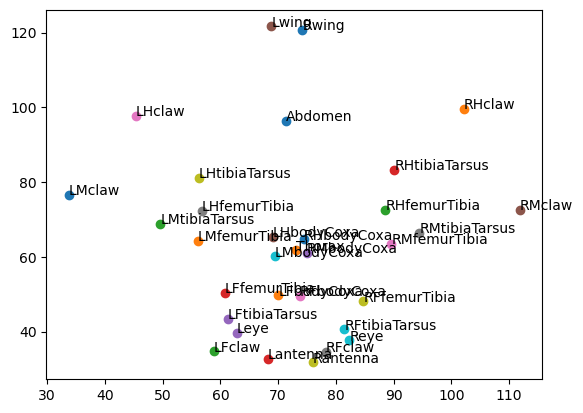

In [11]:
time_point = 14000
dlc_key_points = data.columns.levels[0].drop('stimulation')
for pts in dlc_key_points[1:]:
    plt.scatter(data[(pts,'x')][0], data[(pts,'y')][time_point], label=pts)
    # write the label of the point
    plt.text(data[(pts,'x')][0], data[(pts,'y')][time_point], pts)

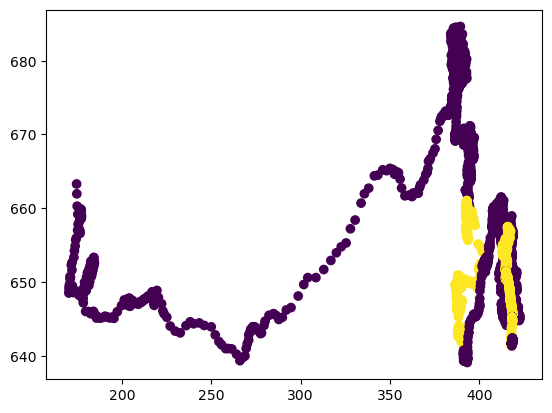

In [12]:
plt.scatter(
    data.loc[:, (slice(None), 'pos_x')],
    data.loc[:, (slice(None), 'pos_y')],
    c=data['stimulation'])

In [13]:
#dlc_path = os.path.join(data_path, 'resultsDLC','vid_p6-0_on0_fly0DLC_resnet50_dlcTrackingAug6shuffle1_1030000.h5')
#dlc_data = pd.read_hdf(dlc_path)
#dlc_data

In [14]:
#dlc_data.columns.levels[1]

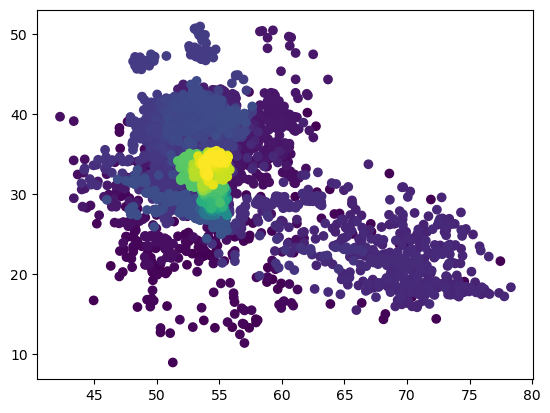

In [15]:
plt.scatter(
    data.loc[:, ('LFclaw', 'x')],
    data.loc[:, ('LFclaw', 'y')],
    c=data.index)

In [16]:
data.columns.levels[0]

Index([              0,       'Abdomen',    'LFbodyCoxa',        'LFclaw',
        'LFfemurTibia', 'LFtibiaTarsus',    'LHbodyCoxa',        'LHclaw',
        'LHfemurTibia', 'LHtibiaTarsus',    'LMbodyCoxa',        'LMclaw',
        'LMfemurTibia', 'LMtibiaTarsus',      'Lantenna',          'Leye',
               'Lwing',    'RFbodyCoxa',        'RFclaw',  'RFfemurTibia',
       'RFtibiaTarsus',    'RHbodyCoxa',        'RHclaw',  'RHfemurTibia',
       'RHtibiaTarsus',    'RMbodyCoxa',        'RMclaw',  'RMfemurTibia',
       'RMtibiaTarsus',      'Rantenna',          'Reye',         'Rwing',
              'Thorax',   'stimulation'],
      dtype='object')

In [17]:
def tracking_motion_energy(data):
    # calculate the motion energy of the legs
    # data is a pandas dataframe with the columns containing the x and y
    # coordinates of the legs
    # returns a pandas dataframe with the motion energy of each leg
    # the motion energy is calculated as the sum of the squared differences
    # between the coordinates of the leg in the current frame and the
    # coordinates of the leg in the previous frame
    for point in data.columns.levels[0][1:-1]:
        dx = data.loc[:, (point, 'x')].diff()
        dx = dx.fillna(0)
        dy = data.loc[:, (point, 'y')].diff()
        dy = dy.fillna(0)
        me = dx.values**2 + dy.values**2
        # create a new column
        data.loc[:,(point,'me')] = me
    # sort the columns by the first level
    data = data.sort_index(axis=1)
    return data

def add_savgol_filtered_x_y(data):
    '''
    Adds columns to the data frame with the x and y coordinates filtered with
    a Savitzky-Golay filter. Rename the initial x and y columns to x_raw and
    y_raw.
    '''
    for point in data.columns.levels[0][1:-1]:
        data.loc[:,(point,'x_raw')] = data.loc[:,(point,'x')]
        data.loc[:,(point,'y_raw')] = data.loc[:,(point,'y')]
        data.loc[:,(point,'x')] = savgol_filter(data.loc[:,(point,'x')], 51, 3)
        data.loc[:,(point,'y')] = savgol_filter(data.loc[:,(point,'y')], 51, 3)
    # sort the columns by the first level
    data = data.sort_index(axis=1)
    return data
    

In [18]:
data = add_savgol_filtered_x_y(data)
data = tracking_motion_energy(data)
data

#data.loc[:, (slice(None), point, 'me')] = np.sqrt(np.square(dx).values + np.square(dy).values)


0                Abdomen                                  \
            pos_x       pos_y likelihood        me          x      x_raw   
frame                                                                      
0      174.590855  663.285310        1.0  0.000000  71.087844  71.357224   
1      174.725101  661.947046        1.0  0.026691  70.986610  70.992882   
2      174.912346  660.275880        1.0  0.022115  70.890975  71.466537   
3      175.266904  659.179775        1.0  0.018128  70.800880  71.000160   
4      175.421628  657.802032        1.0  0.014685  70.716267  71.405464   
...           ...         ...        ...       ...        ...        ...   
14395  418.413977  642.197497        1.0  0.001902  71.471883  71.247345   
14396  418.413977  642.197497        1.0  0.002315  71.493828  71.662766   
14397  418.423072  642.188361        1.0  0.002788  71.517966  71.253716   
14398  418.444990  642.210153        1.0  0.003327  71.544393  71.674820   
14399  418.445072  642.231863        1.0  0.003935  71.573207  71.687462   

                            LFbodyCoxa            ...      Rwing              \
               y      y_raw likelihood        me  ...      x_raw           y   
frame                                             ...                          
0      98.784928  98.751724        1.0  0.000000  ...  74.207115  120.326509   
1      98.656697  99.004906        1.0  0.470132  ...  74.055260  120.186682   
2      98.542815  98.674599        1.0  0.396613  ...  74.491661  120.062793   
3      98.442760  99.423424        1.0  0.331506  ...  74.231636  119.954264   
4      98.356013  98.756821        1.0  0.274201  ...  74.329376  119.860517   
...          ...        ...        ...       ...  ...        ...         ...   
14395  96.793163  96.990883        1.0  0.012725  ...  72.268623  119.524736   
14396  96.750343  96.406372        1.0  0.015214  ...  73.547066  119.302456   
14397  96.703378  96.994751        1.0  0.018039  ...  72.266426  119.060089   
14398  96.652113  96.435448        1.0  0.021226  ...  73.506035  118.796884   
14399  96.596392  96.437851        1.0  0.024804  ...  73.542427  118.512094   

                      Thorax                                             \
            y_raw likelihood        me          x      x_raw          y   
frame                                                                     
0      120.063202        1.0  0.000000  72.754647  73.044701  64.789246   
1      120.093079        1.0  0.354248  72.776276  72.219315  64.194452   
2      119.976715        1.0  0.295819  72.793500  73.315147  63.650832   
3      120.986473        1.0  0.244433  72.806531  73.190201  63.156603   
4      120.649261        1.0  0.199555  72.815584  73.130127  62.709978   
...           ...        ...       ...        ...        ...        ...   
14395  120.721542        1.0  0.001520  70.100440  70.041580  59.478837   
14396  117.438744        1.0  0.001531  70.103816  70.006050  59.439860   
14397  120.727715        1.0  0.001540  70.107731  70.048004  59.400810   
14398  117.424583        1.0  0.001549  70.112197  69.948616  59.361701   
14399  117.425713        1.0  0.001558  70.117227  69.954933  59.322550   

                 stimulation  
           y_raw              
frame                         
0      62.825230           0  
1      64.962494           0  
2      64.889153           0  
3      65.966820           0  
4      65.376556           0  
...          ...         ...  
14395  59.769390           0  
14396  58.471519           0  
14397  59.778656           0  
14398  58.417725           0  
14399  58.422337           0  

[14400 rows x 195 columns]

In [19]:
def add_legs_motion_energy(data):
    '''
    Adds a column to data with the motion energy of the legs.
    We sum the ME of the end effectors of all legs.
    '''
    list_legs = ['LFclaw', 'LMclaw', 'LHclaw', 'RFclaw', 'RMclaw', 'RHclaw']
    # check if the columns are in the data frame
    for leg in list_legs:
        if leg not in data.columns.levels[0]:
            print('The leg {} is not in the data frame'.format(leg))
            return data
    # calculate the motion energy of the legs
    leg_me_subset = data.loc[:, (list_legs, 'me')]
    leg_me = leg_me_subset.sum(axis=1)
    # add the motion energy to the data frame
    data.loc[:, ('legs', 'me')] = leg_me
    # sort the columns by the first level
    data = data.sort_index(axis=1)
    return data

In [20]:
data = add_legs_motion_energy(data)
data

0                Abdomen                                  \
            pos_x       pos_y likelihood        me          x      x_raw   
frame                                                                      
0      174.590855  663.285310        1.0  0.000000  71.087844  71.357224   
1      174.725101  661.947046        1.0  0.026691  70.986610  70.992882   
2      174.912346  660.275880        1.0  0.022115  70.890975  71.466537   
3      175.266904  659.179775        1.0  0.018128  70.800880  71.000160   
4      175.421628  657.802032        1.0  0.014685  70.716267  71.405464   
...           ...         ...        ...       ...        ...        ...   
14395  418.413977  642.197497        1.0  0.001902  71.471883  71.247345   
14396  418.413977  642.197497        1.0  0.002315  71.493828  71.662766   
14397  418.423072  642.188361        1.0  0.002788  71.517966  71.253716   
14398  418.444990  642.210153        1.0  0.003327  71.544393  71.674820   
14399  418.445072  642.231863        1.0  0.003935  71.573207  71.687462   

                            LFbodyCoxa            ...       Rwing              \
               y      y_raw likelihood        me  ...           y       y_raw   
frame                                             ...                           
0      98.784928  98.751724        1.0  0.000000  ...  120.326509  120.063202   
1      98.656697  99.004906        1.0  0.470132  ...  120.186682  120.093079   
2      98.542815  98.674599        1.0  0.396613  ...  120.062793  119.976715   
3      98.442760  99.423424        1.0  0.331506  ...  119.954264  120.986473   
4      98.356013  98.756821        1.0  0.274201  ...  119.860517  120.649261   
...          ...        ...        ...       ...  ...         ...         ...   
14395  96.793163  96.990883        1.0  0.012725  ...  119.524736  120.721542   
14396  96.750343  96.406372        1.0  0.015214  ...  119.302456  117.438744   
14397  96.703378  96.994751        1.0  0.018039  ...  119.060089  120.727715   
14398  96.652113  96.435448        1.0  0.021226  ...  118.796884  117.424583   
14399  96.596392  96.437851        1.0  0.024804  ...  118.512094  117.425713   

          Thorax                                                        \
      likelihood        me          x      x_raw          y      y_raw   
frame                                                                    
0            1.0  0.000000  72.754647  73.044701  64.789246  62.825230   
1            1.0  0.354248  72.776276  72.219315  64.194452  64.962494   
2            1.0  0.295819  72.793500  73.315147  63.650832  64.889153   
3            1.0  0.244433  72.806531  73.190201  63.156603  65.966820   
4            1.0  0.199555  72.815584  73.130127  62.709978  65.376556   
...          ...       ...        ...        ...        ...        ...   
14395        1.0  0.001520  70.100440  70.041580  59.478837  59.769390   
14396        1.0  0.001531  70.103816  70.006050  59.439860  58.471519   
14397        1.0  0.001540  70.107731  70.048004  59.400810  59.778656   
14398        1.0  0.001549  70.112197  69.948616  59.361701  58.417725   
14399        1.0  0.001558  70.117227  69.954933  59.322550  58.422337   

      stimulation       legs  
                          me  
frame                         
0               0   0.000000  
1               0  24.122203  
2               0  20.989205  
3               0  18.177394  
4               0  15.663994  
...           ...        ...  
14395           0   0.106951  
14396           0   0.129154  
14397           0   0.154438  
14398           0   0.183054  
14399           0   0.215266  

[14400 rows x 196 columns]

In [21]:
#plt.scatter(
#    data.loc[:, ('LFclaw', 'x')].diff(),
#    data.index,
#    c=data.loc[:, ('LFclaw', 'me')],
#    alpha=0.5)

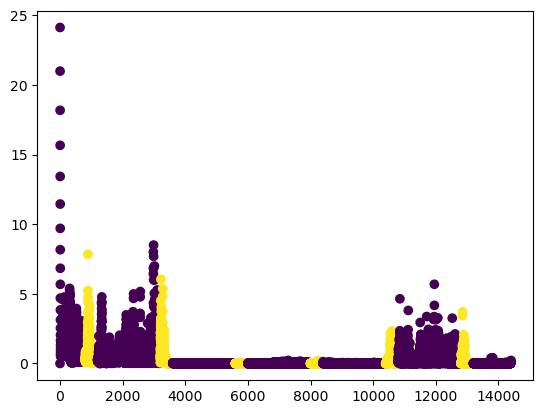

In [22]:

plt.scatter(data.index,data.loc[:, ('legs', 'me')], c=data['stimulation'])